<a href="https://colab.research.google.com/github/gulabpatel/Computer_Vision/blob/main/03_feature_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

Load Three Images

In [ ]:
url_1 = "https://raw.githubusercontent.com/phoolpreet/CV_Stuff/main/0121.jpg"
url_2 = "https://raw.githubusercontent.com/phoolpreet/CV_Stuff/main/0125.jpg"
url_3 = "https://raw.githubusercontent.com/phoolpreet/CV_Stuff/main/0129.jpg"

image_1 = io.imread(url_1)
image_2 = io.imread(url_2)
image_3 = io.imread(url_3)

# convert to grey scale
image_1 = image_1[:,:, 0]
image_2 = image_2[:,:, 0]
image_3 = image_3[:,:, 0]

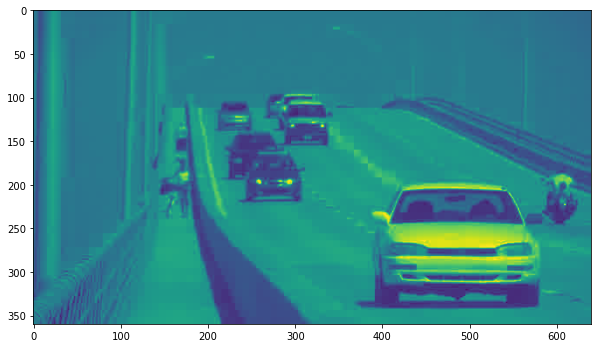

In [ ]:
plt.figure(figsize = (10, 10))
plt.imshow(image_1)

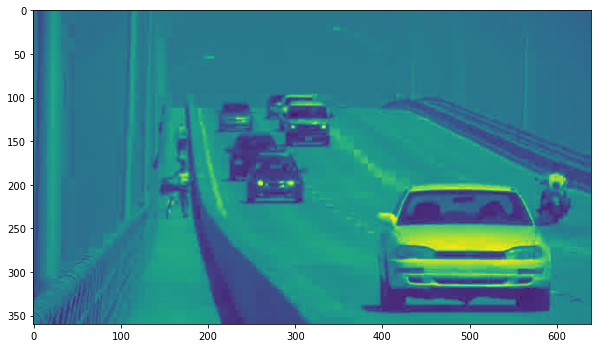

In [ ]:
plt.figure(figsize = (10, 10))
plt.imshow(image_2)

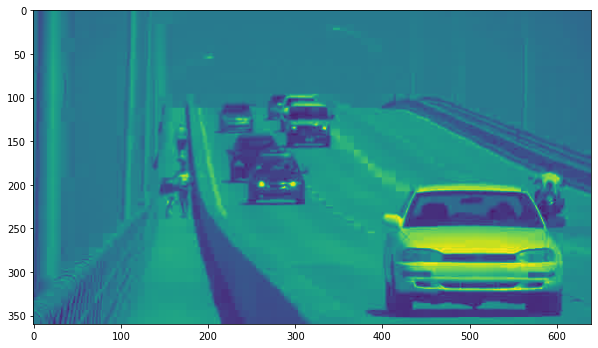

In [ ]:
plt.figure(figsize = (10, 10))
plt.imshow(image_3)

Feature Extraction

In [ ]:
features_1 = cv2.goodFeaturesToTrack(image_1, maxCorners=500, qualityLevel=.1, minDistance=5, mask=None)
features_1

array([[[610., 223.]],

       [[332., 132.]],

       [[261., 198.]],

       [[298., 132.]],

       [[543., 208.]],

       [[559., 304.]],

       [[257., 195.]],

       [[560., 244.]],

       [[319., 100.]],

       [[280., 195.]],

       [[232., 122.]],

       [[408., 233.]],

       [[544., 297.]],

       [[279., 106.]],

       [[288.,  98.]],

       [[281., 201.]],

       [[424., 303.]],

       [[288., 114.]],

       [[537., 205.]],

       [[424., 208.]],

       [[287., 196.]],

       [[411., 243.]],

       [[439., 296.]],

       [[296., 199.]],

       [[530., 278.]],

       [[320., 128.]],

       [[294., 107.]],

       [[544., 307.]],

       [[439., 306.]],

       [[288., 106.]],

       [[ 63., 285.]],

       [[533., 304.]],

       [[257., 176.]],

       [[567., 267.]],

       [[491., 331.]],

       [[585., 231.]],

       [[482., 331.]],

       [[297., 151.]],

       [[176., 186.]],

       [[232., 190.]],

       [[246., 122.]]], dtype=float32)

Lucas Kanade Tracker

In [ ]:
features_2, status, err = cv2.calcOpticalFlowPyrLK(prevImg=image_1, nextImg=image_2, prevPts=features_1, 
                                                   nextPts=None, status=None, err=None, winSize=(15,15), maxLevel=2)

Keep only successfuly tracked features

In [ ]:
features_1 = features_1[status==1]
features_1 = features_1.reshape(-1, 1, 2)
features_2 = features_2[status==1]
features_2 = features_2.reshape(-1, 1, 2)

In [ ]:
features_2

array([[[601.91425 , 221.8584  ]],

       [[333.5952  , 133.35655 ]],

       [[262.52985 , 199.67517 ]],

       [[298.70526 , 133.26868 ]],

       [[553.6864  , 209.08176 ]],

       [[571.33093 , 307.9556  ]],

       [[258.56714 , 196.6636  ]],

       [[571.3617  , 245.93752 ]],

       [[319.61954 , 101.18393 ]],

       [[281.56888 , 196.45605 ]],

       [[234.244   , 123.5076  ]],

       [[415.22803 , 234.6502  ]],

       [[555.6507  , 301.03552 ]],

       [[279.7148  , 107.522865]],

       [[288.6933  ,  99.12591 ]],

       [[282.6563  , 202.48848 ]],

       [[431.45914 , 307.23627 ]],

       [[288.77374 , 115.305214]],

       [[547.3446  , 205.99065 ]],

       [[431.40527 , 209.16267 ]],

       [[288.80878 , 197.41737 ]],

       [[418.0912  , 245.19632 ]],

       [[447.0377  , 299.70932 ]],

       [[297.71295 , 200.44771 ]],

       [[540.6593  , 281.46356 ]],

       [[321.1006  , 129.20522 ]],

       [[294.79535 , 108.28091 ]],

       [[555.73474 , 311.340

Repeat for successive frames

In [ ]:
features_3, status, err = cv2.calcOpticalFlowPyrLK(prevImg=image_2, nextImg=image_3, prevPts=features_2, 
                                                   nextPts=None, status=None, err=None, winSize=(15,15), maxLevel=2)
features_1 = features_1[status==1]
features_1 = features_1.reshape(-1, 1, 2)
features_2 = features_2[status==1]
features_2 = features_2.reshape(-1, 1, 2)
features_3 = features_3[status==1]
features_3 = features_3.reshape(-1, 1, 2)

Visualize Results

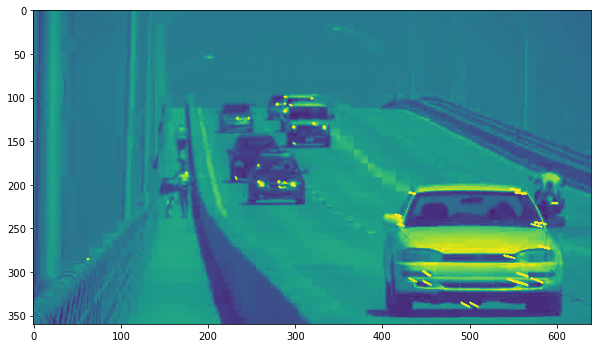

In [ ]:
for i,(new,old) in enumerate(zip(features_3, features_2)):
  a,b = new.ravel()
  c,d = old.ravel()
  color = [255, 255, 255] #np.random.randint(0, 255, 3).tolist()
  image_3 = cv2.line(image_3, (a,b),(c,d), color, 2)
  #image_3 = cv2.circle(image_3,(a,b), 5, color, -1)

plt.figure(figsize = (10, 10))
plt.imshow(cv2.UMat.get(image_3))
plt.show()

-------------